# Content Based Recommender Project

For this project we will use create a content based movie recommender system using Natural Language Processing (NLP)

The dataset is IMDB top 250 English movies downloaded from data.world.
>>>>https://data.world/studentoflife/imdb-top-250-lists-and-5000-or-so-data-records

In [2]:
pip install rake_nltk

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from rake_nltk import Rake
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/IMDB_Top250Engmovies2_OMDB_Detailed.csv


In [5]:
df = pd.read_csv('/kaggle/input/IMDB_Top250Engmovies2_OMDB_Detailed.csv')
df.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         250 non-null    int64  
 1   Title              250 non-null    object 
 2   Year               250 non-null    int64  
 3   Rated              250 non-null    object 
 4   Released           248 non-null    object 
 5   Runtime            250 non-null    object 
 6   Genre              250 non-null    object 
 7   Director           250 non-null    object 
 8   Writer             249 non-null    object 
 9   Actors             250 non-null    object 
 10  Plot               250 non-null    object 
 11  Language           250 non-null    object 
 12  Country            250 non-null    object 
 13  Awards             245 non-null    object 
 14  Poster             250 non-null    object 
 15  Ratings.Source     250 non-null    object 
 16  Ratings.Value      250 non

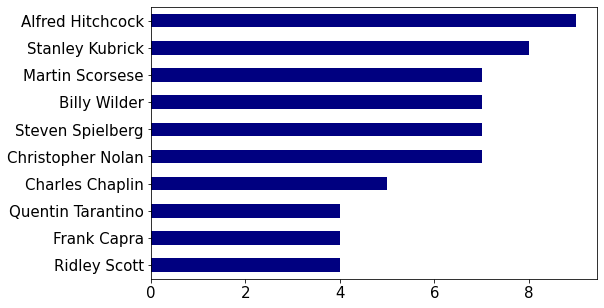

In [7]:
df['Director'].value_counts()[0:10].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis();

In [8]:
df["Plot"]

0      Two imprisoned men bond over a number of years...
1      The aging patriarch of an organized crime dyna...
2      The early life and career of Vito Corleone in ...
3      When the menace known as the Joker emerges fro...
4      A jury holdout attempts to prevent a miscarria...
                             ...                        
245    The desperate life of a chronic alcoholic is f...
246    A 20-something supervising staff member of a r...
247    A newspaper editor uses every trick in the boo...
248    An old man makes a long journey by lawn-mover ...
249    A Mumbai teen reflects on his upbringing in th...
Name: Plot, Length: 250, dtype: object

In [9]:
df['Key_words'] = ''
r = Rake()

def extractor(row):
    r.extract_keywords_from_text(row)
    key_words_dict_scores = r.get_word_degrees()
    return list(key_words_dict_scores.keys()) # to extract the most relevant words from whole sentences in column

df['Key_words'] = df['Plot'].map(lambda row : extractor(row))
    

In [10]:
df['Key_words']

0      [common, decency, two, imprisoned, men, bond, ...
1      [organized, crime, dynasty, transfers, control...
2      [michael, 1920s, new, york, portrayed, career,...
3      [gotham, fight, injustice, people, joker, emer...
4      [evidence, jury, holdout, attempts, miscarriag...
                             ...                        
245    [day, drinking, bout, followed, four, desperat...
246    [troubled, waters, something, supervising, sta...
247    [ace, reporter, ex, wife, book, newspaper, edi...
248    [relationship, ill, brother, old, man, makes, ...
249    [mumbai, teen, reflects, wants, indian, versio...
Name: Key_words, Length: 250, dtype: object

In [11]:
df['Genre'] = df['Genre'].map(lambda x: x.split(','))
df['Actors'] = df['Actors'].map(lambda x: x.split(',')[:3])
df['Director'] = df['Director'].map(lambda x: x.split(','))


In [12]:
def lower_text(row):
    row = [x.lower().replace(' ','') for x in row]
    return row

df['Genre'] = df['Genre'].map(lambda row : lower_text(row))
df['Actors'] = df['Actors'].map(lambda row : lower_text(row))
df['Director'] = df['Director'].map(lambda row : lower_text(row))


In [13]:
df[['Director', 'Actors', 'Genre', 'Key_words']]

,Director,Actors,Genre,Key_words
0,[frankdarabont],"[timrobbins, morganfreeman, bobgunton]","[crime, drama]","[common, decency, two, imprisoned, men, bond, ..."
1,[francisfordcoppola],"[marlonbrando, alpacino, jamescaan]","[crime, drama]","[organized, crime, dynasty, transfers, control..."
2,[francisfordcoppola],"[alpacino, robertduvall, dianekeaton]","[crime, drama]","[michael, 1920s, new, york, portrayed, career,..."
3,[christophernolan],"[christianbale, heathledger, aaroneckhart]","[action, crime, drama]","[gotham, fight, injustice, people, joker, emer..."
4,[sidneylumet],"[martinbalsam, johnfiedler, leej.cobb]","[crime, drama]","[evidence, jury, holdout, attempts, miscarriag..."
...,...,...,...,...
245,[billywilder],"[raymilland, janewyman, phillipterry]","[drama, film-noir]","[day, drinking, bout, followed, four, desperat..."
246,[destindanielcretton],"[brielarson, johngallagherjr., stephaniebeatriz]",[drama],"[troubled, waters, something, supervising, sta..."
247,[howardhawks],"[carygrant, rosalindrussell, ralphbellamy]","[comedy, drama, romance]","[ace, reporter, ex, wife, book, newspaper, edi..."
248,[davidlynch],"[sissyspacek, janegallowayheitz, josepha.carpe...","[biography, drama]","[relationship, ill, brother, old, man, makes, ..."


In [14]:
df['Actors'] = df['Actors'].apply(', '.join)
df['Genre'] = df['Genre'].apply(', '.join)
df['Director'] = df['Director'].apply(', '.join)
df['Key_words'] = df['Key_words'].apply(', '.join)

In [15]:
df[['Director', 'Actors', 'Genre', 'Key_words']]

,Director,Actors,Genre,Key_words
0,frankdarabont,"timrobbins, morganfreeman, bobgunton","crime, drama","common, decency, two, imprisoned, men, bond, n..."
1,francisfordcoppola,"marlonbrando, alpacino, jamescaan","crime, drama","organized, crime, dynasty, transfers, control,..."
2,francisfordcoppola,"alpacino, robertduvall, dianekeaton","crime, drama","michael, 1920s, new, york, portrayed, career, ..."
3,christophernolan,"christianbale, heathledger, aaroneckhart","action, crime, drama","gotham, fight, injustice, people, joker, emerg..."
4,sidneylumet,"martinbalsam, johnfiedler, leej.cobb","crime, drama","evidence, jury, holdout, attempts, miscarriage..."
...,...,...,...,...
245,billywilder,"raymilland, janewyman, phillipterry","drama, film-noir","day, drinking, bout, followed, four, desperate..."
246,destindanielcretton,"brielarson, johngallagherjr., stephaniebeatriz",drama,"troubled, waters, something, supervising, staf..."
247,howardhawks,"carygrant, rosalindrussell, ralphbellamy","comedy, drama, romance","ace, reporter, ex, wife, book, newspaper, edit..."
248,davidlynch,"sissyspacek, janegallowayheitz, josepha.carpenter","biography, drama","relationship, ill, brother, old, man, makes, m..."


In [16]:

df['Bag_of_words'] = df["Genre"] + ' ' + df["Director"] + ' '+ df["Actors"] + ' '+ df['Key_words']
df['Bag_of_words'] = df['Bag_of_words'].replace(',','', regex=True)
df['Bag_of_words']



0      crime drama frankdarabont timrobbins morganfre...
1      crime drama francisfordcoppola marlonbrando al...
2      crime drama francisfordcoppola alpacino robert...
3      action crime drama christophernolan christianb...
4      crime drama sidneylumet martinbalsam johnfiedl...
                             ...                        
245    drama film-noir billywilder raymilland janewym...
246    drama destindanielcretton brielarson johngalla...
247    comedy drama romance howardhawks carygrant ros...
248    biography drama davidlynch sissyspacek janegal...
249    drama dannyboyle loveleentandan devpatel saura...
Name: Bag_of_words, Length: 250, dtype: object

In [17]:
df = df[['Title','Bag_of_words']]
df

,Title,Bag_of_words
0,The Shawshank Redemption,crime drama frankdarabont timrobbins morganfre...
1,The Godfather,crime drama francisfordcoppola marlonbrando al...
2,The Godfather: Part II,crime drama francisfordcoppola alpacino robert...
3,The Dark Knight,action crime drama christophernolan christianb...
4,12 Angry Men,crime drama sidneylumet martinbalsam johnfiedl...
...,...,...
245,The Lost Weekend,drama film-noir billywilder raymilland janewym...
246,Short Term 12,drama destindanielcretton brielarson johngalla...
247,His Girl Friday,comedy drama romance howardhawks carygrant ros...
248,The Straight Story,biography drama davidlynch sissyspacek janegal...


In [18]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['Bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.15789474 0.13764944 ... 0.05263158 0.05263158 0.05564149]
 [0.15789474 1.         0.36706517 ... 0.05263158 0.05263158 0.05564149]
 [0.13764944 0.36706517 1.         ... 0.04588315 0.04588315 0.04850713]
 ...
 [0.05263158 0.05263158 0.04588315 ... 1.         0.05263158 0.05564149]
 [0.05263158 0.05263158 0.04588315 ... 0.05263158 1.         0.05564149]
 [0.05564149 0.05564149 0.04850713 ... 0.05564149 0.05564149 1.        ]]


In [20]:
indices = pd.Series(df['Title'])

In [21]:
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(df['Title'])[i])
        
    return recommended_movies

In [22]:
recommend('The Avengers')

['Guardians of the Galaxy Vol. 2',
 'Aliens',
 'Guardians of the Galaxy',
 'The Martian',
 'Interstellar',
 'Blade Runner',
 'Terminator 2: Judgment Day',
 'The Thing',
 'The Terminator',
 'Spider-Man: Homecoming']

In [23]:
recommend('The Dark Knight')

['The Dark Knight Rises',
 'Batman Begins',
 'The Prestige',
 'The Green Mile',
 'Witness for the Prosecution',
 'Out of the Past',
 'Rush',
 'The Godfather',
 'V for Vendetta',
 'Reservoir Dogs']

In [24]:
recommend('Forrest Gump')

NameError: name 'recommender' is not defined